### Git versioning

In [28]:
import git  #Requires Gitpython installed, to install do "$ pip install Gitpython" in your terminal
import pkg_resources
openfisca_france_location = pkg_resources.get_distribution('openfisca-france').location
repo = git.Repo(openfisca_france_location)
repo.git.status()

sha = repo.head.object.hexsha

print "---This notebook have been runed with--- \n","Openfisca-france :", repo.head.object.hexsha, '\n' 
print "Commit short SHA:", repo.git.rev_parse(sha, short=4)
print "Branch: ", repo.git.rev_parse('--abbrev-ref', "HEAD") #equivalent to: $git rev-parse --abbrev-ref HEAD
print "Date (y/m/d):", repo.git.show("-s", '--format=%ci', 'HEAD^')[:-5],"\n"  # equivalent to: $git show -s --format=%ci HEAD^

print "Openfisca-core :", git.Repo(pkg_resources.get_distribution('openfisca-core').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-core').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "Openfisca-france-data :", git.Repo(pkg_resources.get_distribution('openfisca-france-data').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-france-data').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "OpenFisca-Aggregates :", git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "OpenFisca-Survey-Manager :", git.Repo(pkg_resources.get_distribution('OpenFisca-Survey-Manager').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]

---This notebook have been runed with--- 
Openfisca-france : 884e029dd9ec0f5dc8129a52e9a61f5cc87770aa 

Commit short SHA: 884e0
Branch:  mensualisation_wip
Date (y/m/d): 2016-05-30 16:54:22  

Openfisca-core : 4076f591f4bcb571391b65a989e1603fdc4cb759  Date: 2016-02-24 16:11:57 
Openfisca-france-data : 4581a82fd1456cbe0bdd86ab1b57db6fef37c8cf  Date: 2016-05-31 15:46:50 
OpenFisca-Aggregates : fd210d8cfdf6ed68f173d9d5c3eab4a4302ed2b9  Date: 2016-04-04 11:35:03 
OpenFisca-Survey-Manager : 868512d24307aa75cfa7bbbf8420542960963966  Date: 2016-04-04 11:35:03 


### Imports

In [29]:
%matplotlib inline
from __future__ import division

from openfisca_core import periods
from openfisca_plugin_aggregates.tests.reform.test_aggregates_mensualized import create_survey_scenario
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
from numpy import (datetime64, logical_and as and_, logical_not as not_, logical_or as or_, logical_xor as xor_,
maximum as max_, minimum as min_, round)


#Faire des filtres pour Mahdi survey_scenario.create_data_frame_by_entity_key_plural

pd.set_option('expand_frame_repr', False)  #utile quand on utilise pandas en mode console
pd.set_option("display.max_rows",201)
pd.set_option("display.max_columns",201)

# Create Survey Scenario

In [30]:
period = periods.period(2009)

In [31]:
survey_scenario = create_survey_scenario(2009)
survey_scenario.new_simulation()

##### weights

In [32]:
weight_foyers = survey_scenario.simulation.calculate_add('weight_foyers', period = period).astype(float)
weight_menages = survey_scenario.simulation.calculate_add('wprm', period = period).astype(float)
weight_familles = survey_scenario.simulation.calculate_add('weight_familles', period = period).astype(float)
weight_individus = survey_scenario.simulation.calculate_add('weight_individus', period = period).astype(float)

In [33]:
print weight_foyers.sum() , "foyers fiscaux"
print weight_menages.sum() , "ménages"
print weight_familles.sum(), "familles"
print weight_individus.sum(), "individus"

33262201.0 foyers fiscaux
27299608.0 ménages
30475517.0 familles
61228244.0 individus


In [34]:
variable = 'revdisp_mensuel_ir_mensuel'
monthly_df = pd.DataFrame(
                dict((column_name+"_"+period, survey_scenario.simulation.calculate_add(column_name, period)) 
                for period in ['{}-{}'.format( 2009, str(month).zfill(2)) for month in range(1, 13)] for column_name in [variable]) #TODO mensualize : allow for periods
                )
#monthly_df.T

In [35]:
#monthly_df.T
monthly_df['revdisp_mensuel_ir_mensuel_2009-09'].mean()

2523.0269

In [ ]:
survey_scenario.compute_aggregate('revdisp_mensuel_annuel')/27000000

In [ ]:
survey_scenario.compute_aggregate('revdisp_mensuel_ir_mensuel')/27000000

In [ ]:
survey_scenario.compute_aggregate('revdisp_mensuel_ir_mensuel')/27000000

In [ ]:
pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')).value_counts()#TODO !

In [ ]:
survey_scenario.compute_aggregate('irpp')

In [ ]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('mini_mensuel','2009-{}'.format(month))).mean()


In [ ]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('revdisp_mensuel_annuel','2009-{}'.format(month))).mean()


In [ ]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('revdisp_mensuel_ir_mensuel','2009-{}'.format(month))).mean()


In [ ]:
for month in range(1,13):
    print 'annuel', pd.Series(survey_scenario.simulation.calculate('utility_ir_annuel','2009-{}'.format(month))).mean()
    print 'mensuel', pd.Series(survey_scenario.simulation.calculate('utility_ir_mensuel','2009-{}'.format(month))).mean()

In [ ]:
decote_monthly = pd.Series(survey_scenario.simulation.calculate_add("decote_gain_fiscal_mensuel_times_12")/12)
decote_annual =  pd.Series(survey_scenario.simulation.calculate_add('decote_gain_fiscal'))

In [ ]:
(pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009')) < 0 ).value_counts()

In [37]:
revdisp = pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009'))
revdisp = pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009'))
revdisp[revdisp<0]

Series([], dtype: float32)

In [38]:
decote = survey_scenario.simulation.calculate('decote_menage')
decote_mensuel = survey_scenario.simulation.calculate_add('decote_mensuel_menage')

In [39]:
pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<0.000001)].value_counts(normalize = True)

NameError: name 'u_c_ir' is not defined

In [ ]:
plt.bar()

In [ ]:
(pd.Series(decote!= decote_mensuel)[((u_c_ir - u_ir_a)<0)]).hist(bins = 100)

In [ ]:
revdisp[(u_c_ir>=u_ir_a)]

In [ ]:
print u_c_ir[(decote_annual==0) & (decote_monthly==0)].mean()
print u_ir_m[(decote_annual==0) & (decote_monthly==0)].mean()
print u_ir_a[(decote_annual==0) & (decote_monthly==0)].mean()

In [ ]:
survey_scenario.compute_aggregate("utility_ir_annuel")

In [ ]:
survey_scenario.compute_aggregate("ra_rsa_i_mensualise")

In [ ]:
for presta in ['rev_trav_mensuel' , 'pen_mensuel' , 'psoc_mensuel','ppe']:
    print presta
    for month in range(1,13):
        print pd.Series(survey_scenario.simulation.calculate(presta,'2009-{}'.format(month))).mean()


## Compare IRPP on monthly basis vs. on annual basis

In [ ]:
print survey_scenario.compute_aggregate('irpp')/10**9
print survey_scenario.compute_aggregate('irpp_mensuel')/10**9
print "l'impot mensuel mène à un prélèvement de {} euros en plus".format(survey_scenario.compute_aggregate('irpp_mensuel')-survey_scenario.compute_aggregate('irpp') )

In [ ]:
pd.Series(survey_scenario.simulation.calculate("irpp") == survey_scenario.simulation.calculate("irpp_mensuel")).value_counts()

In [ ]:
#np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('irpp'),survey_scenario.simulation.calculate_add("irpp_mensuel"), decimal = -0,
#                                    )

#### Lambda compensation

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
lambda_compensation[np.abs(lambda_compensation)-0.2 >= 0 ].hist(bins = 70000, weight = survey_scenario.simulation.calculate("wprm"))
plt.xlim(-20,20)

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
lambda_compensation[np.abs(lambda_compensation)-0.2 >= 0 ].hist(bins = 700000)
plt.xlim(-20,20)

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
lambda_compensation[np.abs(lambda_compensation)-2000 >= 0 ].hist(bins = 10)
#plt.xlim(-20,20)

#### Pourcentage du sample à 0

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
#lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
#lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)==0].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda égal à 0 ".format(round(prct1,2)*100)

#### Pourcentage du sample presque à 0

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)<0.01].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda égal à 0 ".format(round(prct1,2)*100)

#### Pourcentage du sample > ou < à  0

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<0].shape[0]/lambda_compensation.shape[0]
prct2 = lambda_compensation[lambda_compensation>0].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda < à 0 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0 ".format(round(prct2,2)*100)

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<-0.01].shape[0]/lambda_compensation.shape[0]
prct2 = lambda_compensation[lambda_compensation>0.01].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda < à -0.01 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0.01 ".format(round(prct2,2)*100)

#### Pourcentage du sample entre -20 et 20

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)>70].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda supérieur  à 70 ".format(round(prct,2)*100)

#### Lambda compensation négatif du à la décote ?

In [ ]:
pd.Series(survey_scenario.simulation.calculate_add("decote_mensuel_times_12")/12).mean()

In [ ]:
decote_monthly = pd.Series(survey_scenario.simulation.calculate_add("decote_mensuel_times_12")/12)
decote_annual =  pd.Series(survey_scenario.simulation.calculate_add("decote"))

In [ ]:
filtre_unequal_decote = decote_monthly != decote_annual

In [ ]:
lambda_compensation[filtre_unequal_decote].shape

In [ ]:
lambda_compensation[filtre_unequal_decote&
                    (np.abs(lambda_compensation)>.1)&
                    (np.abs(lambda_compensation)<100)].hist(bins = 500)
plt.xlim(-20,20)

In [ ]:
to_graph = lambda_compensation[filtre_unequal_decote&
                    (np.abs(lambda_compensation)>.1)&
                    (np.abs(lambda_compensation)<100)]


In [ ]:
poids = pd.Series(weight_foyers)[
        filtre_unequal_decote&
        (np.abs(lambda_compensation)>.1)&
        (np.abs(lambda_compensation)<100)]

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(to_graph.values, bins = 100, weights = poids.values)


In [ ]:
(pd.Series(lambda_compensation == 0 ).value_counts() * weight_foyers


In [ ]:
index_exceptional_lambda = lambda_compensation[np.abs(lambda_compensation)>100].index

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation'])['foyers_fiscaux']
df['decote_gain_fiscal_mensuel'] = df.decote_gain_fiscal_mensuel_times_12/12
df.iloc[index_exceptional_lambda]

In [ ]:
survey_scenario.simulation.calculate("irpp_mensuel","2009-08")[4]

In [ ]:
df["difference"] = np.abs(df.decote_gain_fiscal- df.decote_gain_fiscal_mensuel)>0.01
df[lambda_compensation == -12].difference.value_counts()

In [ ]:
df.shape

In [ ]:
df[lambda_compensation == -12][['decote_gain_fiscal', 'decote_gain_fiscal_mensuel', 'lambda_compensation',"irpp",'irpp_mensuel' ]]

In [ ]:
print df[lambda_compensation == -12][df.]

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
df.lambda_compensation[df.lambda_compensation< -70] = 0

In [ ]:
df[np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)+1>0].shape

In [ ]:
df.lambda_compensation[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-1<0)
                      & (np.abs(df.lambda_compensation)>0.1)].hist(bins = 100)
plt.xlim(-20,20)

In [ ]:
df.lambda_compensation[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-0.1>0)
                      & (np.abs(df.lambda_compensation)>0.1)].mean()

In [ ]:
df[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-0.1>0)
                      & (np.abs(df.lambda_compensation)>0.1)]

In [ ]:
df[df.lambda_compensation<-1]

In [ ]:
df[df.lambda_compensation<-1][df.decote_gain_fiscal> df.decote_gain_fiscal_mensuel_times_12]

## Compensated irpp

In [40]:
print max(pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')))
print min(pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')))

0.09375
-0.03125


In [41]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation', 'compensated_irpp_mensuel'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
#df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
#df.lambda_compensation[df.lambda_compensation< -70] = 0
#df.compensated_irpp_mensuel = df.compensated_irpp_mensuel
df

,compensated_irpp_mensuel,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
0,0.000000,5.894867,10.871246,0.000000,-7.903255,NaN
1,0.000000,0.000000,0.000000,0.000000,-0.000000,NaN
2,0.000000,0.000000,0.000000,0.000000,-0.000000,NaN
3,-1378.829712,-0.000000,-0.000000,-1378.829712,-1378.829956,1.907349e-06
4,-108.488831,252.503723,12.223747,-108.488831,-1942.908325,2.029060e+02
5,-792.612549,24.462494,24.462494,-792.612549,-792.612366,-2.861023e-06
6,-9160.150391,-0.000000,-0.000000,-9160.150391,-9160.149414,-9.536743e-07
7,-2966.809814,-0.000000,223.836288,-2966.810059,-7234.854004,1.726316e+01
8,0.000000,230.505005,230.504959,0.000000,-0.000000,NaN
9,0.000000,102.025002,102.025017,0.000000,-0.000000,NaN


In [42]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation', 'compensated_irpp_mensuel'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
#df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
#df.lambda_compensation[df.lambda_compensation< -70] = 0
#df.compensated_irpp_mensuel = df.compensated_irpp_mensuel
df

,compensated_irpp_mensuel,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
0,0.000000,5.894867,10.871246,0.000000,-7.903255,NaN
1,0.000000,0.000000,0.000000,0.000000,-0.000000,NaN
2,0.000000,0.000000,0.000000,0.000000,-0.000000,NaN
3,-1378.829712,-0.000000,-0.000000,-1378.829712,-1378.829956,1.907349e-06
4,-108.488831,252.503723,12.223747,-108.488831,-1942.908325,2.029060e+02
5,-792.612549,24.462494,24.462494,-792.612549,-792.612366,-2.861023e-06
6,-9160.150391,-0.000000,-0.000000,-9160.150391,-9160.149414,-9.536743e-07
7,-2966.809814,-0.000000,223.836288,-2966.810059,-7234.854004,1.726316e+01
8,0.000000,230.505005,230.504959,0.000000,-0.000000,NaN
9,0.000000,102.025002,102.025017,0.000000,-0.000000,NaN


In [43]:
df[df.compensated_irpp_mensuel - df.irpp<2][['irpp', 'compensated_irpp_mensuel', 'irpp_mensuel']]

,irpp,compensated_irpp_mensuel,irpp_mensuel
0,0.000000,0.000000,-7.903255
1,0.000000,0.000000,-0.000000
2,0.000000,0.000000,-0.000000
3,-1378.829712,-1378.829712,-1378.829956
4,-108.488831,-108.488831,-1942.908325
5,-792.612549,-792.612549,-792.612366
6,-9160.150391,-9160.150391,-9160.149414
7,-2966.810059,-2966.809814,-7234.854004
8,0.000000,0.000000,-0.000000
9,0.000000,0.000000,-0.000000


In [44]:
print survey_scenario.compute_aggregate('compensated_irpp_mensuel')
print survey_scenario.compute_aggregate('irpp')

-48038862125.8
-48038862065.7


In [45]:
impot_mensuel_times_12 = survey_scenario.simulation.calculate("irpp_mensuel", period)*12
lambda_compensation = survey_scenario.simulation.calculate("lambda_compensation", period.this_year)



compensated_irpp = impot_mensuel_times_12/(12 + lambda_compensation)

In [46]:
compensated_irpp[743]

nan

In [47]:
(survey_scenario.simulation.calculate("irpp", period.this_year) == 0)*0

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
compensated_irpp = (survey_scenario.simulation.calculate("irpp", period.this_year) == 0) * 0 + \
                ~(survey_scenario.simulation.calculate("irpp", period.this_year) == 0) * np.nan_to_num(compensated_irpp) ;compensated_irpp[[4,743]]

array([-108.48883057,    0.        ])

In [49]:
compensated_irpp = (
                (survey_scenario.simulation.calculate_add("irpp_mensuel", period) == 0) * #Condition
                (survey_scenario.simulation.calculate("irpp", period.this_year)/12) # on répartit sur l'année
            ) + ~(survey_scenario.simulation.calculate_add("irpp_mensuel", period) == 0) * compensated_irpp #condition opposée
compensated_irpp[[4,743]]

array([-108.48883057,  -32.67856216])

In [50]:
df[df.lambda_compensation.isnull()]

,compensated_irpp_mensuel,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
0,0,5.894867,10.871246,0,-7.903255,NaN
1,0,0.000000,0.000000,0,-0.000000,NaN
2,0,0.000000,0.000000,0,-0.000000,NaN
8,0,230.505005,230.504959,0,-0.000000,NaN
9,0,102.025002,102.025017,0,-0.000000,NaN
12,0,0.000000,0.000000,0,-0.000000,NaN
14,0,0.000000,0.000000,0,-0.000000,NaN
16,0,116.709999,0.000000,0,-462.647491,NaN
24,0,252.215057,252.215012,0,-0.000183,NaN
28,0,0.000000,0.000000,0,-0.000000,NaN


In [51]:
survey_scenario.simulation.calculate_add('irpp')

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [52]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')

-48038862125.764519

In [53]:
lambda_compensation = survey_scenario.simulation.calculate('lambda_compensation')
np.all(lambda_compensation != np.nan)
lambda_compensation != np.nan
hello = lambda_compensation[1]
assert np.all(np.isfinite(lambda_compensation))


AssertionError: 

In [54]:
sal_pen_df = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['irpp'], ['irpp_mensuel','compensated_irpp_mensuel'])['foyers_fiscaux']

sal_pen_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,59774,59775,59776,59777,59778,59779,59780,59781,59782,59783,59784,59785,59786,59787,59788,59789,59790,59791,59792,59793,59794,59795,59796,59797,59798,59799,59800,59801,59802,59803,59804,59805,59806,59807,59808,59809,59810,59811,59812,59813,59814,59815,59816,59817,59818,59819,59820,59821,59822,59823,59824,59825,59826,59827,59828,59829,59830,59831,59832,59833,59834,59835,59836,59837,59838,59839,59840,59841,59842,59843,59844,59845,59846,59847,59848,59849,59850,59851,59852,59853,59854,59855,59856,59857,59858,59859,59860,59861,59862,59863,59864,59865,59866,59867,59868,59869,59870,59871,59872,59873
irpp,0.000000,0,0,-1378.829712,-108.488831,-792.612549,-9160.150391,-2966.810059,0,0,153.500000,-2335.952637,0,-1309.255005,0,-2104.827637,0.000000,166.152588,-4151.707031,-3237.300049,-2124.675049,-877.314941,-601.944092,737.799988,0.000000,-1072.575317,-1089.632202,-433.722321,0,0.00000,0,-1132.755005,-1087.487549,0,0.000000,778.040283,-79.077332,-5260.950195,-576.658875,-1171.852295,-157.122513,-1710.030518,-8168.149902,-502.418640,-7868.875000,-7178.475098,-7609.375000,0,-700.632874,0,0,0,0,0,0.0000,-557.202698,-219.863785,-347.900146,0.00000,-100.774826,-1554.069702,0,-1177.890015,0,-1053.290039,-176.052505,-25070.472656,-950.567383,0.000000,-7382.575195,-1490.895020,-902.614990,-956.515015,0.000000,-464.382507,-19810.775391,-306.282501,-839.862549,-2150.909424,0.000000,-2422.667725,128.607910,221.765015,-781.379395,0,-817.392456,-1687.875000,-2443.069336,-712.655029,-1361.430542,-504.814941,-450.965210,0.000000,0,-244.102661,-607.182739,0,-1016.015015,-2660.685059,0,...,0.0000,-601.302246,0.000000,-1093.915039,0,-474.908691,-948.814697,-2816.445068,-1445.395020,0,-1058.574951,-2052.189941,-595.650024,-267.612518,-1248.135010,-499.992493,-4005.529785,-1531.915039,0,-319.692688,-202.414978,-321.545105,0.00000,-3714.446777,-2004.694702,-687.770264,0,-748.354553,-1434.970215,-424.152496,-244.002533,-163.542511,0.000000,-202.538803,-597.724976,-9831.699219,-257.890350,0,-1735.875000,-4654.606934,720.587402,0,0,0,0,-414.822540,0,-551.364990,0.000000,-1313.714966,0,-694.752075,0,0,0,-1803.330322,-2510.689941,-122.678955,0,-837.510071,-881.647339,0,-1013.949707,0,-2144.870117,-1179.814941,714.760010,-820.122070,-6603.650879,-476.045013,0,-994.734985,-1435.174683,-699.807495,-322.212524,0,0,-1994.087402,0,0,0,0,0,0,-2146.514893,-15008.900391,-315.072510,0,-7257.776367,-2652.369873,-3179.347412,0.000000,-2050.929932,-198.942520,-1824.654785,-12667.373047,0,0.000000,0,0
compensated_irpp_mensuel_2009-01,0.000000,0,0,-114.902489,0.000000,-66.051056,-763.345947,-4.560170,0,0,-47.092911,-194.662720,0,1.160107,0,-175.402283,0.000000,13.846048,-345.975586,-269.775024,-177.056259,5.842635,-50.162003,61.483326,0.000000,-89.381279,-90.802673,-36.143524,0,0.00000,0,-94.396263,-90.623962,0,0.000000,64.836700,-6.589777,-438.412476,3.267014,-97.654358,-13.093544,-142.502563,-680.679138,-41.868217,-655.739502,-598.206360,-634.114563,0,-58.386074,0,0,0,0,0,0.0000,-46.433563,-18.321983,-28.991678,0.00000,-8.397902,-129.505783,0,0.000000,0,-87.774170,-14.671043,-2089.205811,-12.089419,0.000000,-615.214478,-124.241272,-75.217918,-79.709579,0.000000,0.000000,-1650.897705,-25.523539,-69.988548,-179.242477,0.000000,-201.888992,10.717326,18.480419,-65.114952,0,0.000000,-187.541641,-203.589127,-59.387913,-113.452560,-42.067917,-37.580429,0.000000,0,-20.341888,-50.598564,0,-84.667923,-221.723755,0,...,0.0000,-50.108521,0.000000,-91.159599,0,-39.575726,-79.067886,-234.703735,-160.599442,0,-88.214569,-171.015808,-49.637497,-22.301043,-104.011261,-41.666039,-11.911106,0.000000,0,-26.641056,0.000000,-26.795427,0.00000,-309.537201,-167.057907,-57.314194,0,-62.362877,-119.580856,1.13

In [ ]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')

## Utility annalysis 

In [55]:
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_annuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_compensated_ir_mensuel','2009')).mean()

-0.00447867
-0.00447854
-0.00447669


In [56]:
u_c_ir = pd.Series(survey_scenario.simulation.calculate_add('utility_compensated_ir_mensuel','2009'))
u_ir_m = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel','2009'))
u_ir_a = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_annuel','2009'))

In [57]:
print u_c_ir.mean(),1/u_c_ir.mean()
print u_ir_m.mean(),1/u_ir_m.mean()
print u_ir_a.mean(),1/u_ir_a.mean()

-0.00447669 -223.379479846
-0.00447854 -223.286830884
-0.00447867 -223.280446535


In [58]:
print u_c_ir.describe()
print u_ir_m.describe()
print u_ir_a.describe()

count    49016.000000
mean        -0.004477
std          0.000822
min         -0.006125
25%         -0.005013
50%         -0.004504
75%         -0.003924
max         -0.000247
dtype: float64
count    49016.000000
mean        -0.004479
std          0.000823
min         -0.006125
25%         -0.005014
50%         -0.004506
75%         -0.003925
max         -0.000247
dtype: float64
count    49016.000000
mean        -0.004479
std          0.000822
min         -0.006125
25%         -0.005013
50%         -0.004506
75%         -0.003926
max         -0.000247
dtype: float64


In [59]:
print 1/u_c_ir.describe()
print 1/u_ir_m.describe()
print 1/u_ir_a.describe()

count       0.000020
mean     -223.379480
std      1215.939832
min      -163.268352
25%      -199.500729
50%      -222.014856
75%      -254.814861
max     -4051.598892
dtype: float64
count       0.000020
mean     -223.286831
std      1215.148074
min      -163.268352
25%      -199.428011
50%      -221.946902
75%      -254.745398
max     -4051.598892
dtype: float64
count       0.000020
mean     -223.280447
std      1215.852400
min      -163.268352
25%      -199.474581
50%      -221.936190
75%      -254.737723
max     -4051.598892
dtype: float64


(0, 200)

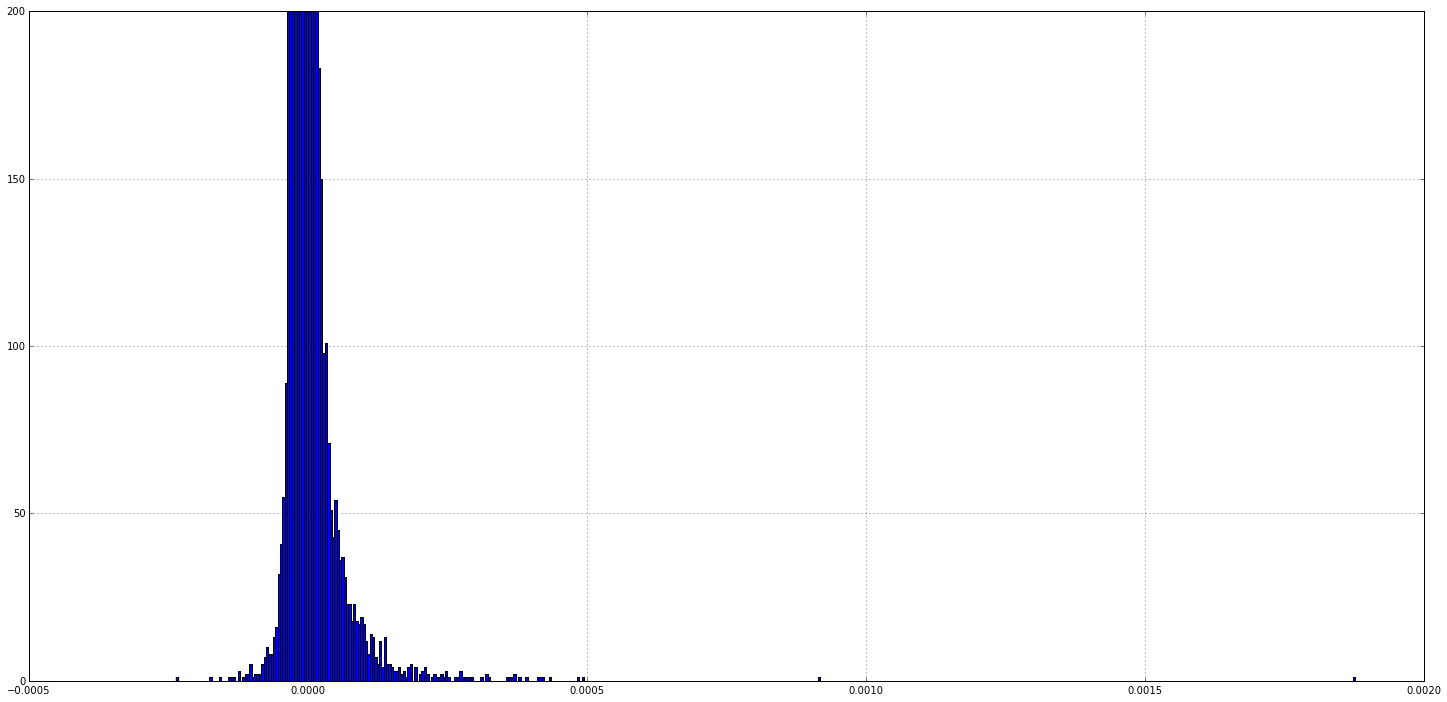

In [120]:
((u_ir_m - u_ir_a)).hist(bins = 500, figsize = (25,12))
plt.ylim(0,200)

In [74]:
((u_ir_m - u_ir_a)<-0.0000001).value_counts()

False    42286
True      6730
dtype: int64

(0, 200)

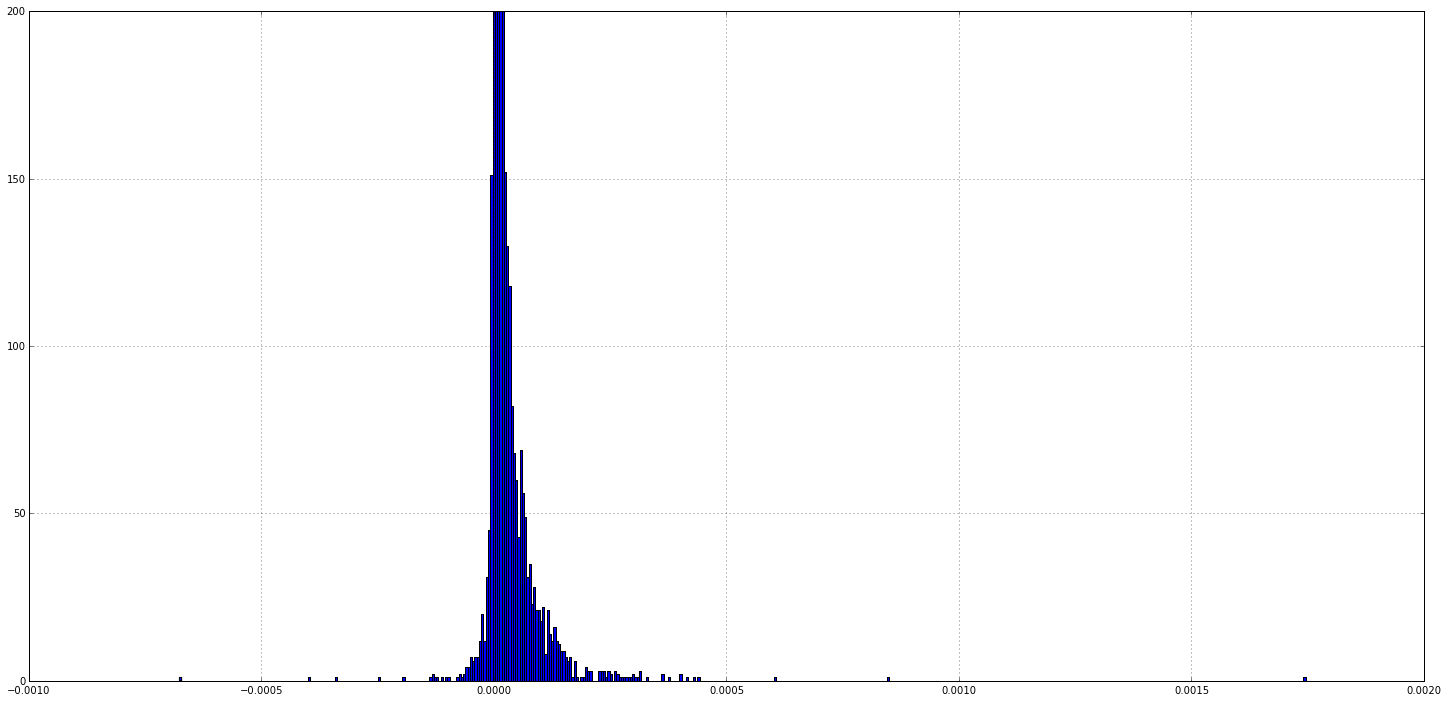

In [121]:
((u_c_ir - u_ir_a)).hist(bins = 500, figsize = (25,12))
plt.ylim(0,200)

In [76]:
((u_c_ir - u_ir_a)<-0.0000001).value_counts()

False    48342
True       674
dtype: int64

##### Graphs with weights

(0, 50000)

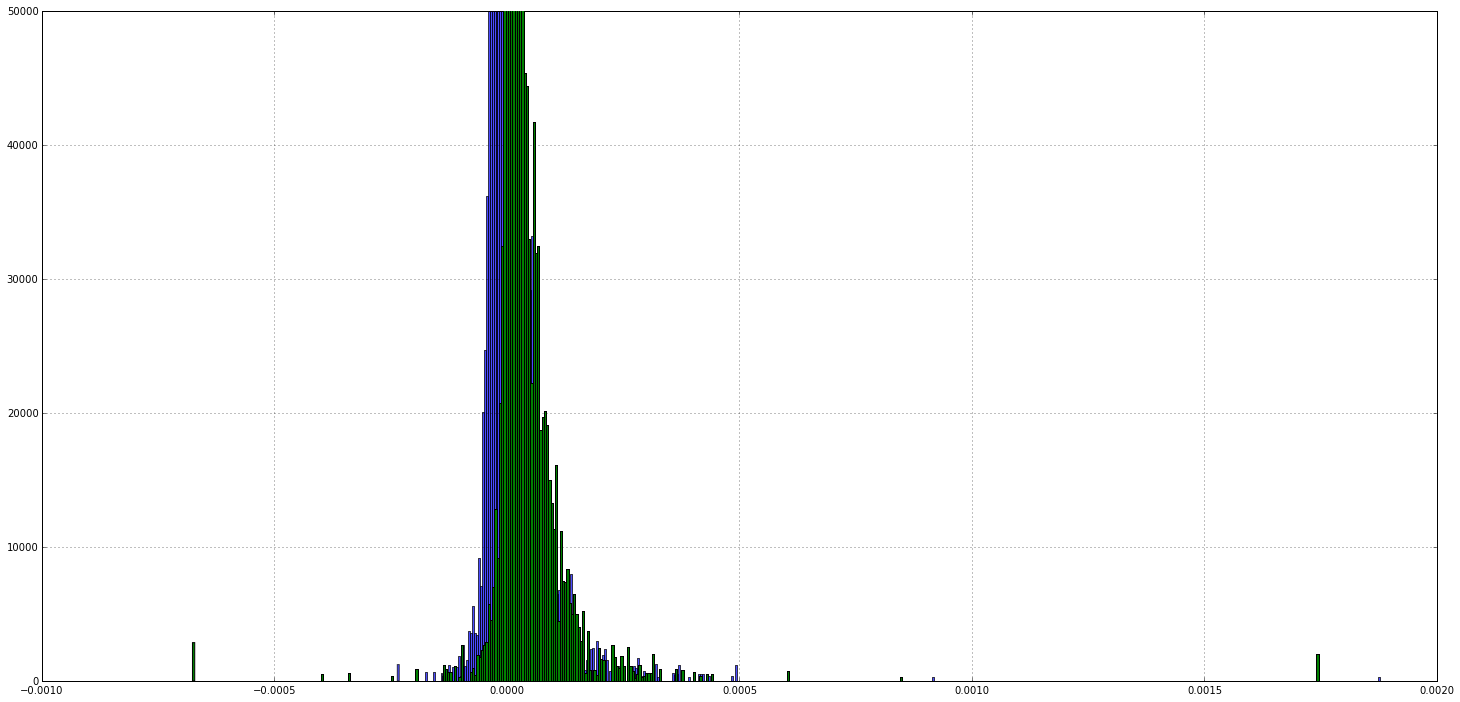

In [92]:
((u_ir_m - u_ir_a)).hist(bins = 500, figsize = (25,12), weights = weight_menages, zorder=1, alpha = 0.7)
((u_c_ir - u_ir_a)).hist(bins = 500, figsize = (25,12), weights = weight_menages,zorder=10, alpha = 1)
plt.ylim(0,5*10**4)

In [1]:
hist1 = ((u_ir_m - u_ir_a)).hist(bins = 200, figsize = (25,12), weights = weight_menages, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
hist2 = ((u_c_ir - u_ir_a)).hist(bins = 200, figsize = (25,12), weights = weight_menages,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
plt.ylim(0,20*10**4)
plt.xlim(-0.0005, 0.0005)
plt.legend()
plt.title("Difference in utility w.r.t annual basis", size = 15)


NameError: name 'u_ir_m' is not defined

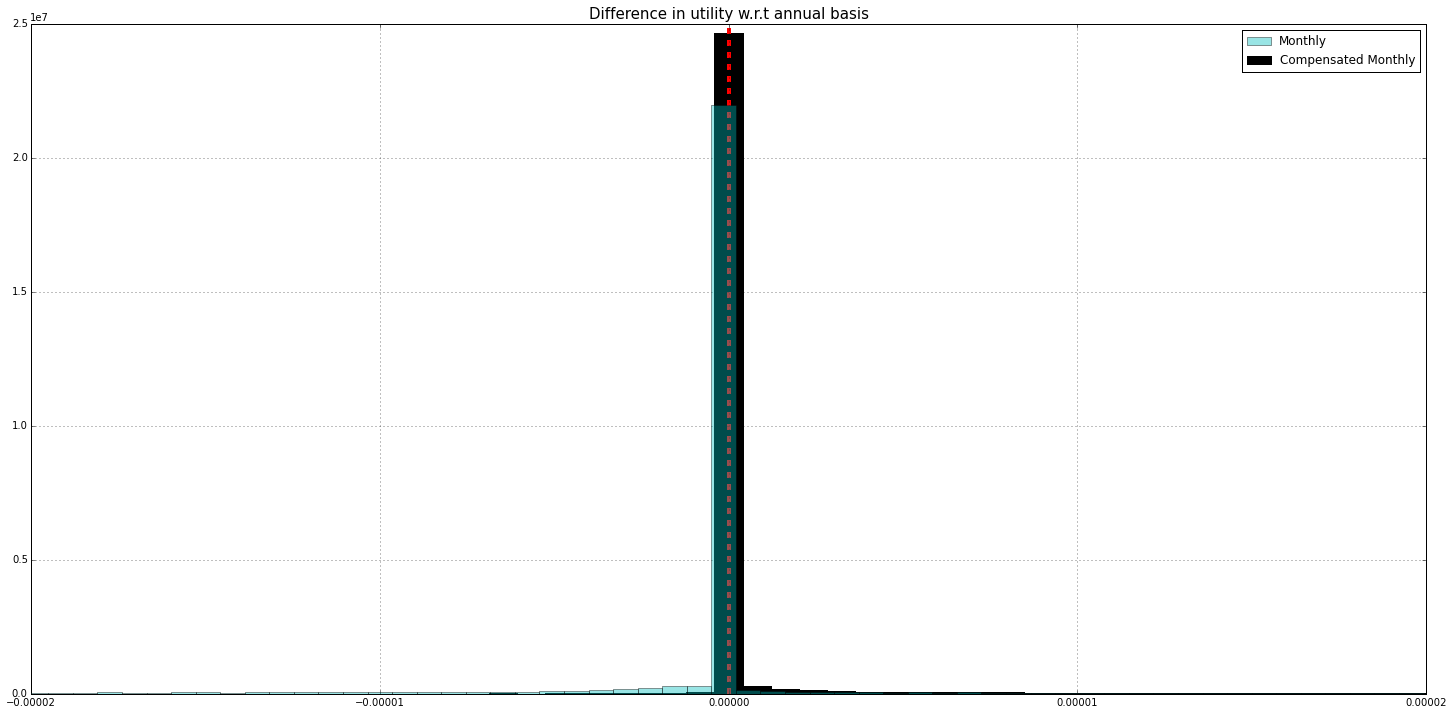

In [182]:
hist1 = ((u_ir_m - u_ir_a)).hist(bins = 3000, figsize = (25,12), weights = weight_menages, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
hist2 = ((u_c_ir - u_ir_a)).hist(bins = 3000, figsize = (25,12), weights = weight_menages,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
#plt.ylim(0,70*10**5)
plt.xlim(-0.00002, 0.00002)
plt.legend()
plt.title("Difference in utility w.r.t annual basis", size = 15)

In [176]:
weight_menages = pd.Series(weight_menages)

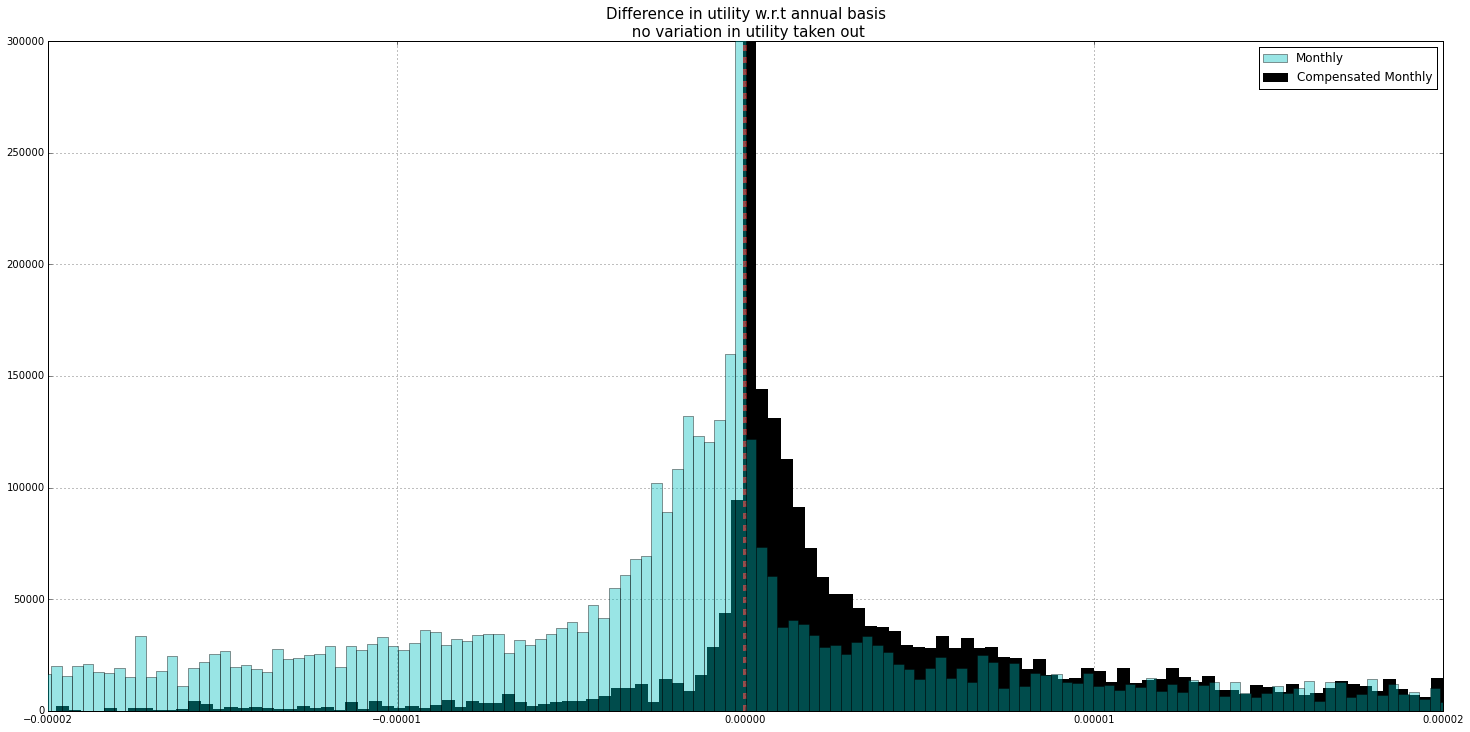

In [185]:


hist1 = ((u_ir_m - u_ir_a))[((u_ir_m - u_ir_a))!=0].hist(bins = 7000, figsize = (25,12), weights = weight_menages[((u_ir_m - u_ir_a))!=0].values, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
hist2 = ((u_c_ir - u_ir_a))[((u_c_ir - u_ir_a))!=0].hist(bins = 7000, figsize = (25,12), weights = weight_menages[((u_c_ir - u_ir_a))!=0].values,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
plt.ylim(0,30*10**4)
plt.xlim(-0.00002, 0.00002)
plt.legend()
plt.title("Difference in utility w.r.t annual basis \n no variation in utility taken out", size = 15)

In [ ]:
decote = survey_scenario.simulation.calculate('decote_menage')
decote_mensuel = survey_scenario.simulation.calculate_add('decote_mensuel_menage')

In [ ]:
(pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel'))[((u_c_ir - u_ir_a)<0)]).hist(bins = 100)

In [ ]:
ax = ((pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.00000001)]).value_counts( normalize = True)*100).plot(kind = "bar",)
plt.ylim((0,100))

labels = ["{}%".format(np.round(i,2)) for i in ((pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.0000001)]).value_counts( normalize = True)*100) ] #0.000001 pour éviter les erreurs d'arrondis.
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [ ]:
pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<0.000001)].value_counts(normalize = True)

In [ ]:
revdisp[(u_c_ir>=u_ir_a)]

In [ ]:
print u_c_ir[(decote_annual==0) & (decote_monthly==0)].mean()
print u_ir_m[(decote_annual==0) & (decote_monthly==0)].mean()
print u_ir_a[(decote_annual==0) & (decote_monthly==0)].mean()

In [ ]:
survey_scenario.compute_aggregate("utility_ir_annuel")

In [ ]:
survey_scenario.compute_aggregate("ra_rsa_i_mensualise")

# END

### Utility :

In [ ]:
def utility(array = None, hp_young_coef = 0.89):
    reference = mesures.revdisp
    label = u"Revenu disponible du ménage"
    def function(self, simulation, period):
        '''
        Revenu disponible - ménage
        'men'
        '''
        utility = -(array + 5000) **-hp_young_coef #on ajoute 5000 pour pas avoir les familles à 0 de revdisp qui font - inf

        return utility

### Taux d'intérêt

In [ ]:
def revdisp_tx(var = None, taux = None):
    revdisp_i = 0
    for month in range(0,12):
        monthly_taux = ((1+taux)**(1/12)) 
        revdisp_i += (
            survey_scenario.simulation.calculate(var, survey_scenario.simulation.period.offset(month, 'month').this_month) 
            / (monthly_taux)**month 
                      )
    return revdisp_i


In [ ]:
revdisp_tx('revdisp_mensuel_ir_mensuel', 1.6)

In [ ]:
survey_scenario.simulation.period.offset(2, 'month').this_month

In [ ]:
variable = 'rsa'
monthly_df = pd.DataFrame(
                dict((column_name+"_"+period, survey_scenario.simulation.calculate_add(column_name, period)) 
                for period in ['{}-{}'.format( 2009, str(month).zfill(2)) for month in range(1, 13)] for column_name in [variable]) #TODO mensualize : allow for periods
                )
monthly_df.T

In [ ]:
ir_comp_df = pd.DataFrame({'diference':(survey_scenario.simulation.calculate("irpp") - (survey_scenario.simulation.calculate_add("irpp_mensuel")/(lambda_compensation+12))*12),
                           'ir_annuel' : survey_scenario.simulation.calculate("irpp"),
                           'ir_mensuel' :  survey_scenario.simulation.calculate("irpp_mensuel"),
                           'ir_mensuel_compensated' :  (survey_scenario.simulation.calculate_add("irpp_mensuel")/(lambda_compensation+12))*12,
                           'lambda_c' : survey_scenario.simulation.calculate("lambda_compensation"),
                           })
ir_comp_df[ir_comp_df.diference > 10]
#ir_comp_df[ir_comp_df.lambda_c > 1]

In [ ]:
print (ir_comp_df[np.abs(ir_comp_df.difence )>10].ir_annuel == 0).value_counts()
ir_comp_df[np.abs(ir_comp_df.difence )>10] # Tout les Ir_mensuel dif

## Tests of conformity

In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('rev_sal'),survey_scenario.simulation.calculate_add("rev_sal_mensuel_times_12")/12, decimal = 1,
                                    ) #Good


In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('salcho_imp'),survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12, decimal = 0,
                                    )  #Semble normal, ce sont les 4% qui touchent les plafonds tspr.abat_pro min et max TODO: à vérifier que c'est bien celà, voir tout en bas.


In [ ]:
print survey_scenario.compute_aggregate('salcho_imp')/10**9
print survey_scenario.compute_aggregate('salcho_imp_mensuel_times_12')/12/10**9

In [ ]:
filter_salcho_imp = ~(np.abs(survey_scenario.simulation.calculate('salcho_imp')- survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12)>2)

In [ ]:

np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate_add('sal_pen_net'),
                                     survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12, decimal = -1,
                                    )

In [ ]:
print survey_scenario.compute_aggregate('sal_pen_net')/10**9
print survey_scenario.compute_aggregate('sal_pen_net_mensuel_times_12')/12/10**9

In [ ]:
print survey_scenario.compute_aggregate('retraite_imposable')/10**9 +  survey_scenario.compute_aggregate('pen_net')/10**9


In [ ]:
np.testing.assert_array_almost_equal(pd.Series(survey_scenario.simulation.calculate_add('sal_pen_net'))[filter_salcho_imp],
                                     pd.Series(survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12)[filter_salcho_imp], decimal = -1,
                                    )

In [ ]:
print survey_scenario.compute_aggregate('sal_pen_net')/10**9
print survey_scenario.compute_aggregate('sal_pen_net_mensuel_times_12')/12/10**9

In [ ]:
print survey_scenario.simulation.calculate_add("sal_pen_net_mensuel_times_12").sum()/12
print ((survey_scenario.simulation.calculate("sal_pen_net").sum()/1)*survey_scenario.simulation.calculate("wprm").sum())
print (survey_scenario.simulation.calculate("sal_pen_net").sum()/1 - survey_scenario.simulation.calculate_add("sal_pen_net_mensuel_times_12").sum()/12)

In [ ]:
survey_scenario.compute_aggregate('sal_pen_net')/10**9

In [ ]:
np.testing.assert_array_almost_equal(pd.Series(survey_scenario.simulation.calculate_add('sal_pen_net'))[filter_salcho_imp],
                                     pd.Series(survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12)[filter_salcho_imp], decimal = -1,
                                    )

In [ ]:
df = pd.DataFrame({'annuel':survey_scenario.simulation.calculate('salcho_imp'),'mensuel':survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12,
                  'frais_reels': survey_scenario.simulation.calculate('frais_reels', "2009"),
                  
                  })
df = df[np.abs(df.annuel - df.mensuel)>1]
print df.shape
df

In [ ]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')/10**9

In [ ]:
lambdac = survey_scenario.simulation.calculate('lambda_compensation')

In [ ]:
survey_scenario.simulation.calculate('irpp_mensuel','2009-01')

In [ ]:
print survey_scenario.simulation.period

In [ ]:
variable ='salaire_imposable'
pd.DataFrame({'tspr':survey_scenario.simulation.calculate(variable,'2009'), variable: survey_scenario.simulation.calculate_add(variable)})

In [ ]:

#survey_scenario = create_survey_scenario(2009)
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['irpp','irpp_mensuel','rng','rng_mensuel_times_12'], ['irpp_mensuel'])['foyers_fiscaux']; df1

In [ ]:
df1[df1.irpp == df1.irpp_mensuel].shape

In [ ]:
df1[df1.irpp != df1.irpp_mensuel]

In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('salcho_imp'),survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12, decimal = -2,
                                    )


In [ ]:
variable = 'frais_reels'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}'.format(variable)], ['{}'.format(variable)])['individus']; 
df1['{}'.format(variable)] = df1['{}'.format(variable)]/12
df1.T

In [ ]:
survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")

In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('rng'),survey_scenario.simulation.calculate_add('rng_mensuel_times_12')/12, decimal = -2,
                                    )


In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('rbg'),survey_scenario.simulation.calculate_add('rbg_mensuel_times_12')/12, decimal = -2,
                                    )

In [ ]:

np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('rev_cat_tspr'),survey_scenario.simulation.calculate_add('rev_cat_tspr_mensuel_times_12')/12, decimal = -2,
                                    )

In [ ]:

np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate_add('sal_pen_net'),survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12, decimal = -2,
                                    )

In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate_add('sal_pen_net'),survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12, decimal = -2,
                                    )

In [ ]:
pd.Series(survey_scenario.simulation.calculate('chomage_imposable','2009-02')).value_counts()

In [ ]:
pd.Series(survey_scenario.simulation.calculate('chomage_imposable')==0).value_counts()

In [ ]:
sal_pen_df = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['sal_pen_net','sal_pen_net_mensuel_times_12'], ['sal_pen_net_mensuel_times_12'])['individus']
sal_pen_df[sal_pen_df.sal_pen_net != sal_pen_df.sal_pen_net_mensuel_times_12/12].T

In [ ]:
variable = 'salaire_imposable'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}'.format(variable)], ['{}'.format(variable)])['individus']; 
df1['{}'.format(variable)] = df1['{}'.format(variable)]/12
df1.T

In [ ]:
#RTO déclarant 1 tous nul
pd.Series(survey_scenario.simulation.calculate('rto_net_declarant1') == 0).value_counts()

In [ ]:
variable = 'salcho_imp'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}_mensuel_times_12'.format(variable)], ['{}_mensuel_times_12'.format(variable)])['individus']; 
df1['{}_mensuel_times_12'.format(variable)] = df1['{}_mensuel_times_12'.format(variable)]/12
df1.T

In [ ]:
pd.DataFrame({'1absolute':survey_scenario.simulation.calculate('rev_cat_tspr')- survey_scenario.simulation.calculate('rev_cat_tspr_mensuel_times_12')/12,
              '2relatif': (survey_scenario.simulation.calculate('rev_cat_tspr') - survey_scenario.simulation.calculate('rev_cat_tspr_mensuel_times_12')/12) /survey_scenario.simulation.calculate('rev_cat_tspr'),
              '3annuel': survey_scenario.simulation.calculate('rev_cat_tspr'),
              '4mensuel': survey_scenario.simulation.calculate('rev_cat_tspr_mensuel_times_12')/12,
             
             
             })

In [ ]:
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['rng'], ['rng_mensuel_times_12'])['foyers_fiscaux']; df1.T

In [ ]:
variable = 'rbg'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}_mensuel_times_12'.format(variable)], ['{}_mensuel_times_12'.format(variable)])['foyers_fiscaux']; 
df1['{}_mensuel_times_12'.format(variable)] = df1['{}_mensuel_times_12'.format(variable)]/12
df1.T

In [ ]:
variable = 'rev_cat_tspr'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}_mensuel_times_12'.format(variable)], ['{}_mensuel_times_12'.format(variable)])['foyers_fiscaux']; 
df1['{}_mensuel_times_12'.format(variable)] = df1['{}_mensuel_times_12'.format(variable)]/12
df1.T

In [ ]:
pd.DataFrame({'tspr':survey_scenario.simulation.calculate("tspr"), 'tspr_mensuel_times12': survey_scenario.simulation.calculate_add('tspr_mensuel_times_12')/12})

In [ ]:
variable ='salaire_imposable'
pd.DataFrame({'tspr':survey_scenario.simulation.calculate(variable,'2009'), variable: survey_scenario.simulation.calculate_add(variable)})

In [ ]:
survey_scenario.simulation.calculate("tspr_mensuel_times_12", '2009-01')

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural_by_period(['irpp_mensuel'], periods_list = ['2009-01','2009-02','2009-03'])['foyers_fiscaux'];df.concat(df1)

In [ ]:
trash_2 = survey_scenario.create_data_frame_by_entity_key_plural_by_period(['salaire_net'], periods_list = ['a','2013'])

In [ ]:
trash['foyers_fiscaux']

In [ ]:
import logging

log = logging.getLogger(__name__)

In [ ]:
log.error('boum')

In [ ]:
periods_list = ["20126"]
for period in periods_list:
            try:
                periods.period(period)
                print 'good'
            except ValueError:
                #log.info("{} in your periods dict is not an OpenFisca period".format(period))
                raise
                print'bad'
                pass

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(variables = ['irpp','irpp_mensuel','rng', 'blob'])['foyers_fiscaux'];df

In [ ]:
survey_scenario.tax_benefit_system.

In [ ]:
survey_scenario.create_data_frame_by_entity_key_plural(variables = ['irpp','irpp_mensuel', 'sali'])

In [ ]:
df[df.irpp +0.05 > df.irpp_mensuel]

In [ ]:
pd.Series((survey_scenario.simulation.calculate('salaire_imposable')>0)).value_counts()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
lambdac = pd.Series(lambdac)

In [ ]:
lambdac.loc[(lambdac == -np.inf)|lambdac.isnull()]=0

In [ ]:
#lambdac.drop(lambdac.loc[((lambdac<0.1) & (lambdac>-0.1))].index, inplace = True)

In [ ]:
lambdac.drop(lambdac.loc[((lambdac>200) | (lambdac<-200))].index, inplace = True)

In [ ]:
lambdac.min()

In [ ]:
lambdac.hist(bins=100)
plt.xlim(-50,150)
plt.ylim(0,2700)

In [ ]:
lambdac[((lambdac>40) & (lambdac<55))].hist(bins = 100)

In [ ]:
pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel')-survey_scenario.simulation.calculate_add('irpp')).hist(bins = 10**4)
#plt.ylim(0,100)
plt.xlim(0,100)

In [ ]:
print survey_scenario.weight_column_name_by_entity_key_plural
survey_scenario.simulation.calculate_add(survey_scenario.weight_column_name_by_entity_key_plural['foyers_fiscaux'], period = period).astype(float)

In [ ]:
weight_foyers = survey_scenario.simulation.calculate_add('weight_foyers', period = period).astype(float)

### Stat de Base sur la différence

In [ ]:
# We put positive value for income tax (negative in openfisca output)
impot_annuel =  -survey_scenario.simulation.calculate('irpp')
impot_mensuel =  -survey_scenario.simulation.calculate_add('irpp_mensuel')

In [ ]:
print "il y a {}/{} cas ou l'impot annuel est null soit {}%".format((impot_annuel == 0).sum(),impot_mensuel.shape[0],(impot_annuel == 0).sum()/impot_mensuel.shape[0] )

In [ ]:
impot_annuel = survey_scenario.simulation.calculate('irpp')
impot_mensuel = survey_scenario.simulation.calculate_add('irpp_mensuel')
print "il y a {}/{} cas ou l'impot annuel et mensuel est null soit {}%".format(((impot_annuel == 0) & (impot_mensuel == 0)).sum(),impot_mensuel.shape[0],((impot_annuel == 0) & (impot_mensuel == 0)).sum()/impot_mensuel.shape[0] )
print "il y a {}/{} cas ou l'impot mensuel est null, mais pas l'annuel soit {}% (pas possible ?)".format(((impot_annuel != 0) & (impot_mensuel == 0)).sum(), impot_mensuel.shape[0],((impot_annuel != 0) & (impot_mensuel == 0)).sum()/impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel soit {}% (pas possible ?)".format((impot_annuel > impot_mensuel).sum(), impot_mensuel.shape[0], (impot_annuel > impot_mensuel).sum()/ impot_mensuel.shape[0])


#### Annuel == mensuel 

In [ ]:
print "il y a {}/{} cas ou l'impot mensuel est égal à l'annuel soit {}% ".format((np.abs(impot_annuel - impot_mensuel)==0).sum(), impot_mensuel.shape[0], (np.abs(impot_annuel - impot_mensuel)==0).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est égal à l'annuel (à 1 cents près) soit {}% ".format((np.abs(impot_annuel - impot_mensuel)<0.01).sum(), impot_mensuel.shape[0], (np.abs(impot_annuel - impot_mensuel)<0.01).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est égal à l'annuel (à 1 euros près) soit {}% ".format((np.abs(impot_annuel - impot_mensuel)<1).sum(), impot_mensuel.shape[0], (np.abs(impot_annuel - impot_mensuel)<1).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est égal à l'annuel (à 10 euros près) soit {}% ".format((np.abs(impot_annuel - impot_mensuel)<10).sum(), impot_mensuel.shape[0], (np.abs(impot_annuel - impot_mensuel)<10).sum()/ impot_mensuel.shape[0])

####  mensuel < annuel (supposé être l'exception)

In [ ]:
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel soit {}% (pas possible ?)".format((impot_annuel > impot_mensuel).sum(), impot_mensuel.shape[0], (impot_annuel > impot_mensuel).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel (à 10 euros près) soit {}% (pas possible ?)".format((impot_annuel-impot_mensuel >10 ).sum(), impot_mensuel.shape[0], ((impot_annuel-impot_mensuel >10)).sum()/ impot_mensuel.shape[0])

In [ ]:
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel (à 10 euros près) soit {}% (pas possible ?)".format((impot_annuel-impot_mensuel >10 ).sum(), impot_mensuel.shape[0], ((impot_annuel-impot_mensuel >10)).sum()/ impot_mensuel.shape[0])

####  mensuel < annuel (supposé être la norme)

In [ ]:
print "il y a {}/{} cas ou l'impot mensuel est supérieur à l'annuel soit {}% (pas possible ?)".format((impot_annuel < impot_mensuel).sum(), impot_mensuel.shape[0], (impot_annuel < impot_mensuel).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est supérieur à l'annuel (à 10 euros près) soit {}% (pas possible ?)".format((impot_mensuel-impot_annuel >10 ).sum(), impot_mensuel.shape[0], ((impot_mensuel-impot_annuel >10)).sum()/ impot_mensuel.shape[0])

In [ ]:
irpp_mois_list = 'ir'

## Différence annuel vs. mensuel

### Perdants

In [ ]:
simulation.calculate

####  mensuel < annuel

In [ ]:
survey_scenario.weight_column_name_by_entity_key_plural

### Nul du à la décote

In [ ]:
decote = survey_scenario.simulation.calculate_add('decote')
ir_plaf_qf = survey_scenario.simulation.calculate_add('ir_plaf_qf')

decote_m = survey_scenario.simulation.calculate_add('decote_mensuel_times_12')
ir_plaf_qf_m = survey_scenario.simulation.calculate_add('ir_plaf_qf_mensuel_times_12')

decote = min_(decote, ir_plaf_qf)
decote_m = min_(decote_m, ir_plaf_qf)

In [ ]:
irpp_mois_list = ['irpp_mois{}'.format(month) for month in range(1,13)]

### DIfférence de décote

In [ ]:
(survey_scenario.compute_aggregate('decote_mensuel_times_12')/12) - (survey_scenario.compute_aggregate('decote'))

## ANnalyse

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel'])['foyers_fiscaux']

In [ ]:
irpp_month = survey_scenario.simulation.calculate('irpp_mensuel', '2009-{}'.format(month))

for month in range(1,13):
    irpp_month = survey_scenario.simulation.calculate('irpp_mensuel', '2009-{}'.format(month))
    irpp_serie = pd.Series(irpp_month, name = 'irpp_{}'.format(month))
    df = df.T.append(irpp_serie).T

In [ ]:
df.T

### Droppe les cas où la différence d'impôt est inférieure à 10 euros

In [ ]:
import numpy as np

In [ ]:
df_ir_1 = df[(np.abs(df.irpp - df.irpp_mensuel) - 5)> 0 ]

In [ ]:
df_ir_1.shape

In [ ]:
(df.decote_gain_fiscal> df.decote_gain_fiscal_mensuel_times_12/12).shape

### Droppe les cas où l'impôt mensuel est supérieur à l'annuel

In [ ]:
df_ir_sup_ir_m = df_ir_1[df_ir_1.irpp < df_ir_1.irpp_mensuel ]

In [ ]:
df_ir_sup_ir_m.T

In [ ]:
print "il y a {} cas ou l'impôt annuel est supérieur au mensuel".format(df_ir_sup_ir_m.shape[0])

#### Différence due à la décote

In [ ]:
df_ir_sup_ir_m.irpp + df_

In [ ]:
df_ir_sup_ir_m.T

In [ ]:
df.irpp

In [ ]:
survey_scenario.create_data_frame_by_entity_key_plural(['irpp','ip_net', ])['foyers_fiscaux']

In [ ]:
survey_scenario.compute_aggregate('irpp')/10**9

In [ ]:
survey_scenario.compute_aggregate('irpp')/10**9

In [ ]:
survey_scenario.compute_aggregate('irpp_mensuel')/10**9

In [ ]:
((impot_annuel == 0) & (impot_mensuel == 0)).sum()

In [ ]:
survey_scenario.compute_pivot_table(columns = ['nbF'], values = ["irpp"])

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['irpp','ip_net', ])['foyers_fiscaux']

In [ ]:
#### Modified Adrien


from numpy import (datetime64, logical_and as and_, logical_not as not_, logical_or as or_, logical_xor as xor_,
maximum as max_, minimum as min_, round)


lambda_compensation = simulation.calculate_add("lambda_compensation")
import pandas as pd
lambda_compensation = pd.Series(lambda_compensation)
print lambda_compensation.isnull().value_counts() #on devrait avoir autant de lambda compensation null que d'IR

higher_mensual = pd.Series((simulation.calculate_add("irpp_mensuel")> simulation.calculate_add('irpp'))).value_counts(dropna = False)
print "There is {} higher mensual then annual IR (not supposed to happened)".format(higher_mensual)

impot_annuel = simulation.calculate("irpp")
impot_mensuel = simulation.calculate_add("irpp_mensuel")
print "il y a {}/{} cas ou l'impot annuel et mensuel est null soit {}%".format(((impot_annuel == 0) & (impot_mensuel == 0)).sum(),impot_mensuel.shape[0],((impot_annuel == 0) & (impot_mensuel == 0)).sum()/impot_mensuel.shape[0] )
print "il y a {}/{} cas ou l'impot mensuel est null, mais pas l'annuel soit {}% (pas possible ?)".format(((impot_annuel != 0) & (impot_mensuel == 0)).sum(), impot_mensuel.shape[0],((impot_annuel != 0) & (impot_mensuel == 0)).sum()/impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel soit {}% (pas possible ?)".format((impot_annuel > impot_mensuel).sum(), impot_mensuel.shape[0], (impot_annuel > impot_mensuel).sum()/ impot_mensuel.shape[0])


irpp = pd.Series(simulation.calculate("irpp"), name = "irpp")
irpp_mensuel = pd.Series(simulation.calculate("irpp_mensuel"),name = 'irpp_mensuel')
decote = pd.Series(simulation.calculate("decote"), name = "decote")
ir_plaf_qf = pd.Series(simulation.calculate("ir_plaf_qf"))
decote = min_(decote, ir_plaf_qf)


ir_plaf_qf_m = pd.Series(simulation.calculate_add("ir_plaf_qf_mensuel_times_12"))
decote_m = pd.Series(simulation.calculate_add("decote_mensuel_times_12"))
decote_m = min_(decote_m, ir_plaf_qf_m)/12

print u"le gain fiscal de la décote est {}% plus élevé en mensuel".format(((decote_m.sum()/decote.sum()-1))*100)




ppe = pd.Series(simulation.calculate("ppe"), name="ppe")

#Qui sont ceux qui payent de l'impôt en trop en mensuel ?


#7657 ;
annomalie = (impot_mensuel<impot_annuel +1) | (impot_mensuel<impot_annuel - 1) #gérer les tout petits problèmes d'arrondis

print u"{}% payent plus en annuel à cause de la décote (ou tout du moins en partie)".format((decote_m[annomalie]==0).value_counts(normalize = True)[0])
print (decote_m[annomalie]==0).value_counts(normalize = True)
#D'ou viennent les autres annomalies, pourquoi plus d'ir en annuel



df_ir_mois = pd.DataFrame()
for mois in range(1,13):
    tempo = pd.Series(simulation.calculate('irpp_mensuel', '2009-{}'.format(mois)))
    tempo.name = 'irpp_mois_{}'.format(mois)
    df_ir_mois = df_ir_mois.append(tempo)

df_ir_mois = df_ir_mois.append(irpp)
df_ir_mois = df_ir_mois.append(irpp_mensuel)

decote.name = "decote"
df_ir_mois = df_ir_mois.append(decote)

decote_m.name = "decote_m"
df_ir_mois = df_ir_mois.append(decote_m)


df_ir_mois.to_hdf('/Users/adrienpacifico/Desktop/to_trash.h5', 'df_ir_mois')


mr = 17352


# Controle

In [ ]:
variable = 'salcho_imp'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}'.format(variable)], ['{}_mensuel_times_12'.format(variable)])['individus']; 
#df1 = df1[df1['{}'.format(variable)] != df1['{}'.format(variable)]]
df1["somme_annuelle"] = (df1.sum(axis = 1) - df1.salcho_imp)/12
df1 = df1[ np.abs(df1['{}'.format("somme_annuelle")] - df1['{}'.format(variable)] >2)]
df1.T

In [ ]:
df = pd.DataFrame({'annuel':survey_scenario.simulation.calculate('salcho_imp'),'mensuel':survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12,
                  'frais_reels': survey_scenario.simulation.calculate('frais_reels', "2009"),
                  
                  })
df = df[np.abs(df.annuel - df.mensuel)>1]
print df.shape
df